In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


|Column|Description|
|-----|-----------|
|`Fecha-I`|Scheduled date and time of the flight.|
|`Vlo-I`|Scheduled flight number.|
|`Ori-I`|Programmed origin city code.|
|`Des-I`|Programmed destination city code.|
|`Emp-I`|Scheduled flight airline code.|
|`Fecha-O`|Date and time of flight operation.|
|`Vlo-O`|Flight operation number of the flight.|
|`Ori-O`|Operation origin city code.|
|`Des-O`|Operation destination city code.|
|`Emp-O`|Airline code of the operated flight.|
|`DIA`|Day of the month of flight operation.|
|`MES`|Number of the month of operation of the flight.|
|`AÑO`|Year of flight operation.|
|`DIANOM`|Day of the week of flight operation.|
|`TIPOVUELO`|Type of flight, I =International, N =National.|
|`OPERA`|Name of the airline that operates.|
|`SIGLAORI`|Name city of origin.|
|`SIGLADES`|Destination city name.|

In addition, the DS considered relevant the creation of the following columns:

|Column|Description|
|-----|-----------|
|`high_season`|1 if `Date-I` is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.|
|`min_diff`|difference in minutes between `Date-O` and `Date-I`|
|`period_day`|morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based on `Date-I`.|
|`delay`|1 if `min_diff` > 15, 0 if not.|

## 0. Load Data

In [2]:
data = pd.read_csv('../data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## 1. Data Analysis: First Sight

### How is the date distribuited?

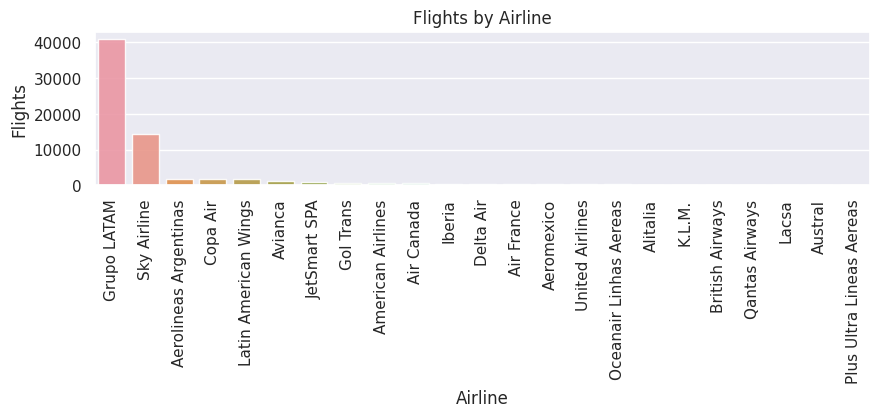

In [3]:
flights_by_airline = data['OPERA'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=flights_by_airline.index, y=flights_by_airline.values, alpha=0.9)
plt.title('Flights by Airline')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

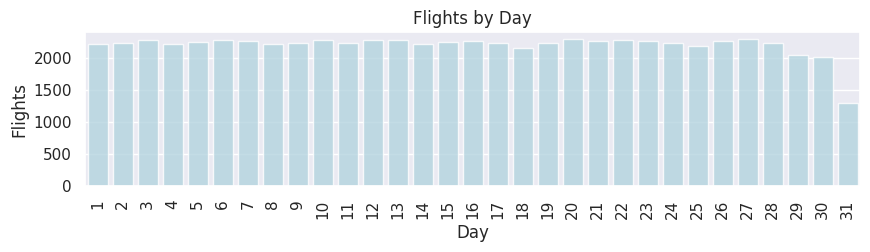

In [4]:
flights_by_day = data['DIA'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style = "darkgrid")
sns.barplot(x=flights_by_day.index, y=flights_by_day.values, color = 'lightblue', alpha=0.8)
plt.title('Flights by Day')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.xticks(rotation=90)
plt.show()

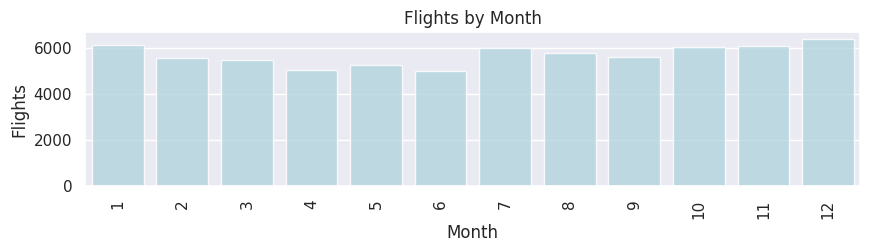

In [5]:
flights_by_month = data['MES'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style = "darkgrid")
sns.barplot(x=flights_by_month.index, y=flights_by_month.values, color = 'lightblue', alpha=0.8)
plt.title('Flights by Month')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.show()

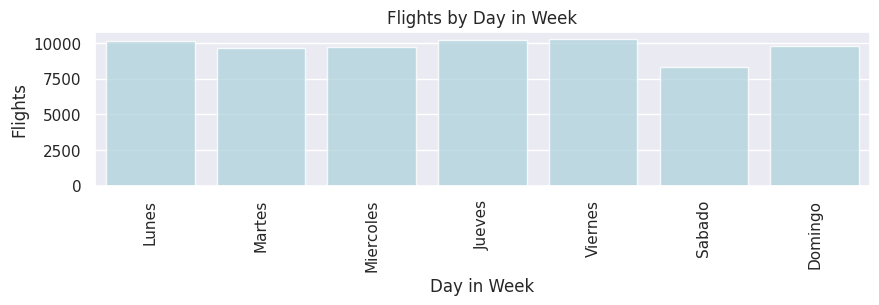

In [6]:
flights_by_day_in_week = data['DIANOM'].value_counts()
days = [
    flights_by_day_in_week.index[2], 
    flights_by_day_in_week.index[5], 
    flights_by_day_in_week.index[4], 
    flights_by_day_in_week.index[1], 
    flights_by_day_in_week.index[0], 
    flights_by_day_in_week.index[6], 
    flights_by_day_in_week.index[3]
]
values_by_day = [
    flights_by_day_in_week.values[2], 
    flights_by_day_in_week.values[5], 
    flights_by_day_in_week.values[4], 
    flights_by_day_in_week.values[1], 
    flights_by_day_in_week.values[0], 
    flights_by_day_in_week.values[6], 
    flights_by_day_in_week.values[3]
]
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=days, y=values_by_day, color = 'lightblue', alpha=0.8)
plt.title('Flights by Day in Week')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day in Week', fontsize=12)
plt.xticks(rotation=90)
plt.show()

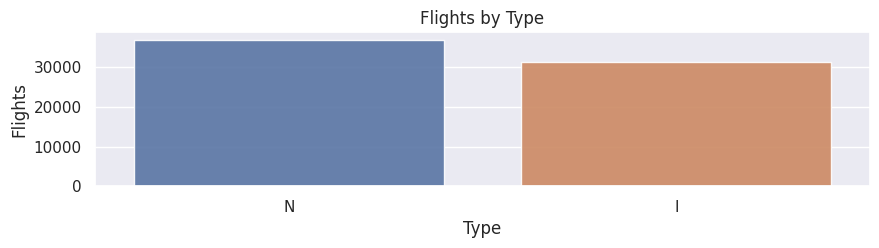

In [7]:
flights_by_type = data['TIPOVUELO'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize = (10, 2))
sns.barplot(x=flights_by_type.index, y=flights_by_type.values, alpha=0.9)
plt.title('Flights by Type')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()

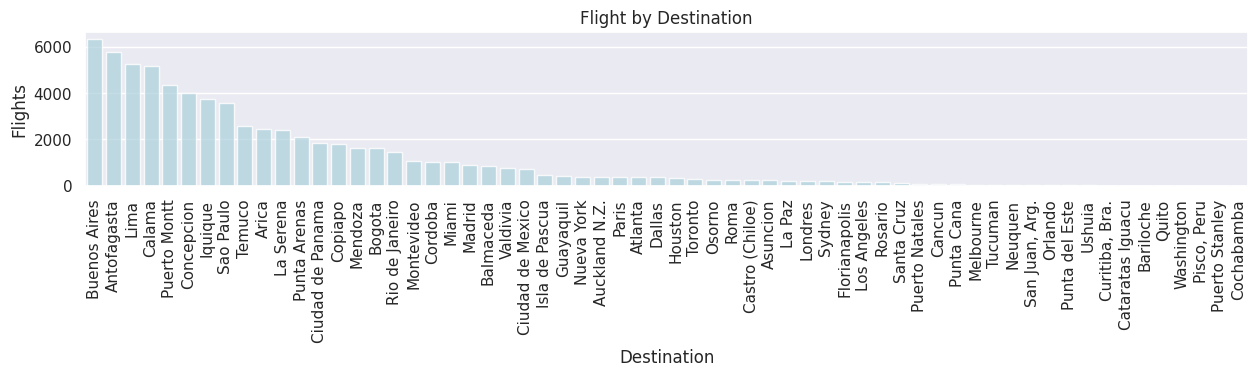

In [8]:
flight_by_destination = data['SIGLADES'].value_counts()
plt.figure(figsize = (15, 2))
sns.set(style="darkgrid")
sns.barplot(x=flight_by_destination.index, y=flight_by_destination.values, color = 'lightblue', alpha=0.8)
plt.title('Flight by Destination')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)

plt.show()

## 2. Features Generation

### 2.a. Period of Day

In [9]:
from datetime import datetime

def get_period_day(date):
    date_time = datetime.strptime(date, '%Y-%m-%d %H:%M:%S').time()
    morning_min = datetime.strptime("05:00", '%H:%M').time()
    morning_max = datetime.strptime("11:59", '%H:%M').time()
    afternoon_min = datetime.strptime("12:00", '%H:%M').time()
    afternoon_max = datetime.strptime("18:59", '%H:%M').time()
    evening_min = datetime.strptime("19:00", '%H:%M').time()
    evening_max = datetime.strptime("23:59", '%H:%M').time()
    night_min = datetime.strptime("00:00", '%H:%M').time()
    night_max = datetime.strptime("4:59", '%H:%M').time()
    
    if(date_time > morning_min and date_time < morning_max):
        return 'mañana'
    elif(date_time > afternoon_min and date_time < afternoon_max):
        return 'tarde'
    elif(
        (date_time > evening_min and date_time < evening_max) or
        (date_time > night_min and date_time < night_max)
    ):
        return 'noche'

In [10]:
data['period_day'] = data['Fecha-I'].apply(get_period_day)

### 2.b. High Season

In [11]:
from datetime import datetime

def is_high_season(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0

In [12]:
data['high_season'] = data['Fecha-I'].apply(is_high_season)

### 2.c. Difference in Minutes

In [13]:
def get_min_diff(data):
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    min_diff = ((fecha_o - fecha_i).total_seconds())/60
    return min_diff

In [14]:
data['min_diff'] = data.apply(get_min_diff, axis = 1)

### 2.d. Delay

In [15]:
threshold_in_minutes = 15
data['delay'] = np.where(data['min_diff'] > threshold_in_minutes, 1, 0)

In [16]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'period_day', 'high_season',
       'min_diff', 'delay'],
      dtype='object')

In [17]:
data.head(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,period_day,high_season,min_diff,delay
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,noche,1,3.0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,noche,1,9.0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,noche,1,9.0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,noche,1,3.0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,noche,1,-2.0,0


## 3. Data Analysis: Second Sight

### How is the delay rate across columns?

In [18]:
def get_rate_from_column(data, column):
    delays = {}
    for _, row in data.iterrows():
        if row['delay'] == 1:
            if row[column] not in delays:
                delays[row[column]] = 1
            else:
                delays[row[column]] += 1
    total = data[column].value_counts().to_dict()
    
    rates = {}
    for name, total in total.items():
        if name in delays:
            rates[name] = round(total / delays[name], 2)
        else:
            rates[name] = 0
            
    return pd.DataFrame.from_dict(data = rates, orient = 'index', columns = ['Tasa (%)'])


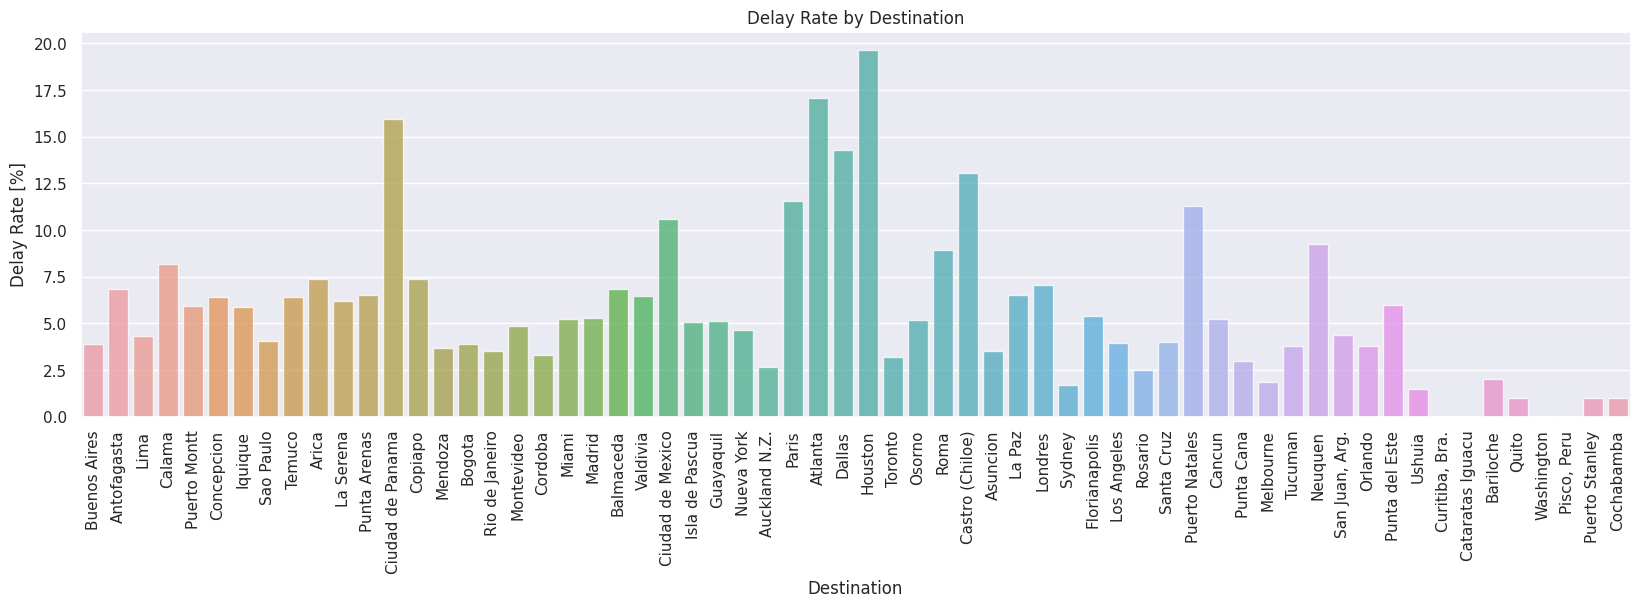

In [19]:
destination_rate = get_rate_from_column(data, 'SIGLADES')
destination_rate_values = data['SIGLADES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=destination_rate_values, y=destination_rate['Tasa (%)'], alpha = 0.75)
plt.title('Delay Rate by Destination')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)
plt.show()


### The above get_rate_from_column function has an issue.


It is defining delay rate as total[city] / count_rows_with_delay[city] So it is not getting the rate correctly.

Example: is Houston city which has 17 delays over 317, so delay rate should be ~ 0.05 (5%)

Going to fix it to count_rows_with_delay[city] / total[city]

In [20]:
####Checking rates
def get_rate_city(data, city):
    stats = data[(data["SIGLADES"] == city)][["SIGLADES", "delay"]]["delay"].value_counts()
    print(f"City: {city}", stats)
    rate = stats[1] / (stats[0] + stats[1])
    print("Rate ( count(min_diff> 15) / total in city: ", round(rate,2) , f"{round(rate*100.0, 2)} %")
get_rate_city(data, city="Buenos Aires")
get_rate_city(data, city="Houston")

City: Buenos Aires 0    4715
1    1620
Name: delay, dtype: int64
Rate ( count(min_diff> 15) / total in city:  0.26 25.57 %
City: Houston 0    317
1     17
Name: delay, dtype: int64
Rate ( count(min_diff> 15) / total in city:  0.05 5.09 %


In [21]:
def get_rate_from_column(data, column):
    delays = {}
    for _, row in data.iterrows():
        if row['delay'] == 1:
            if row[column] not in delays:
                delays[row[column]] = 1
            else:
                delays[row[column]] += 1
    total = data[column].value_counts().to_dict()
    
    rates = {}
    for name, total in total.items():
        if name in delays:
            rates[name] = round((delays[name] / float(total)*100) , 2)
        else:
            rates[name] = 0
            
    return pd.DataFrame.from_dict(data = rates, orient = 'index', columns = ['Tasa (%)'])



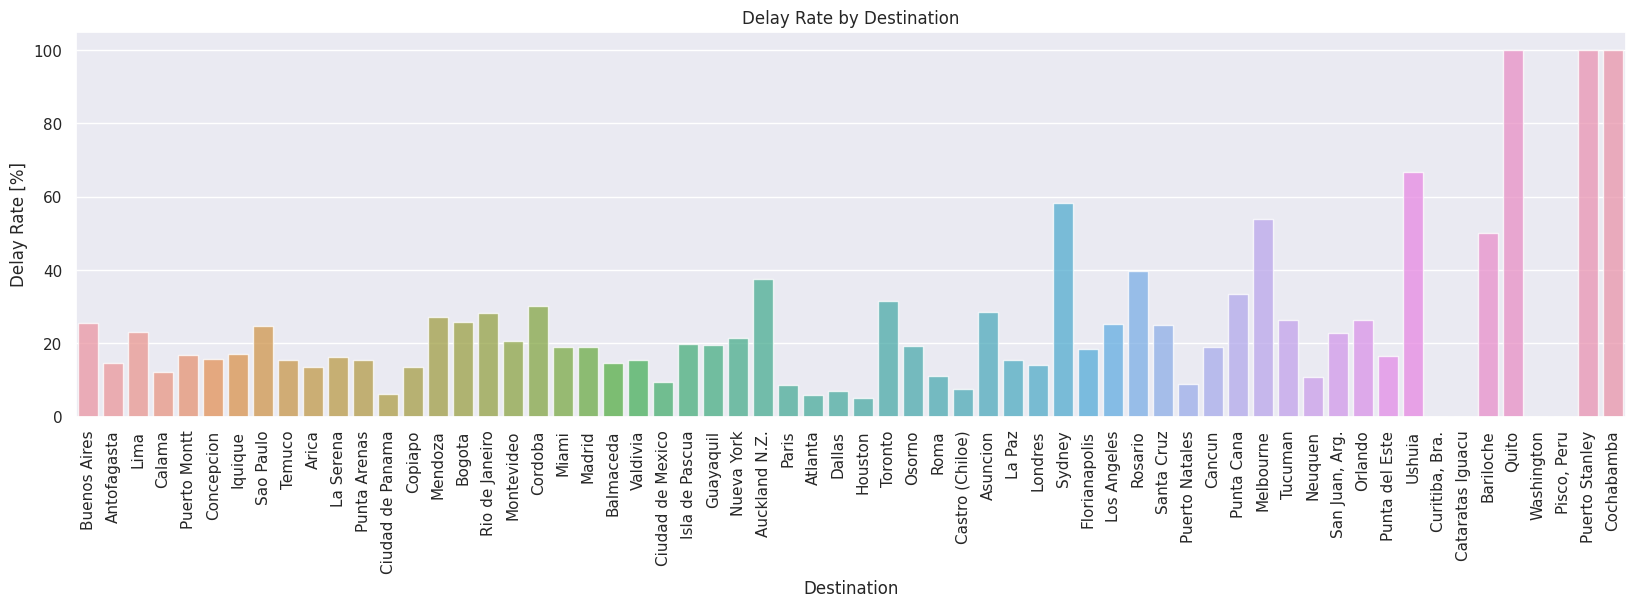

In [22]:
destination_rate = get_rate_from_column(data, 'SIGLADES')
destination_rate_values = data['SIGLADES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=destination_rate_values, y=destination_rate['Tasa (%)'], alpha = 0.75)
plt.title('Delay Rate by Destination')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)
plt.show()

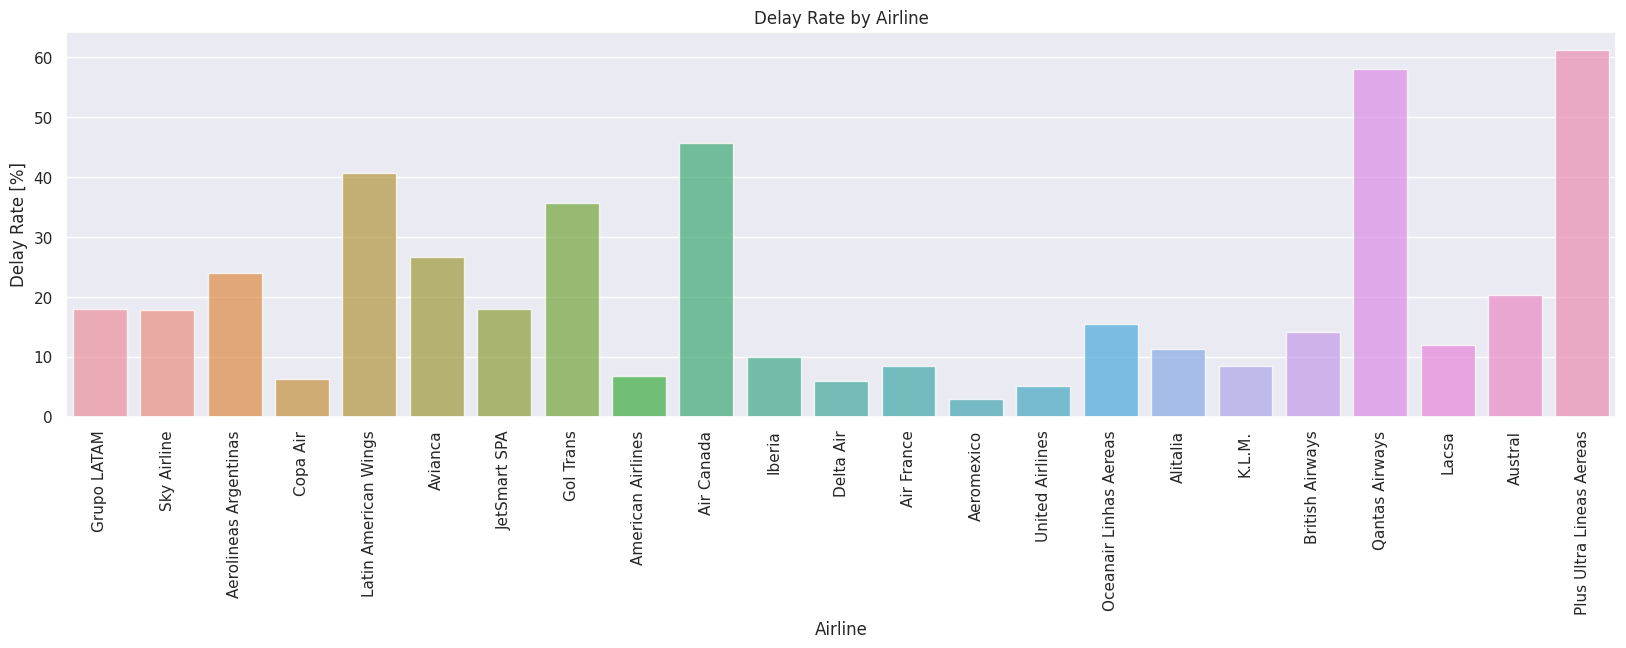

In [23]:
airlines_rate = get_rate_from_column(data, 'OPERA')
airlines_rate_values = data['OPERA'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=airlines_rate_values, y=airlines_rate['Tasa (%)'], alpha = 0.75)
plt.title('Delay Rate by Airline')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

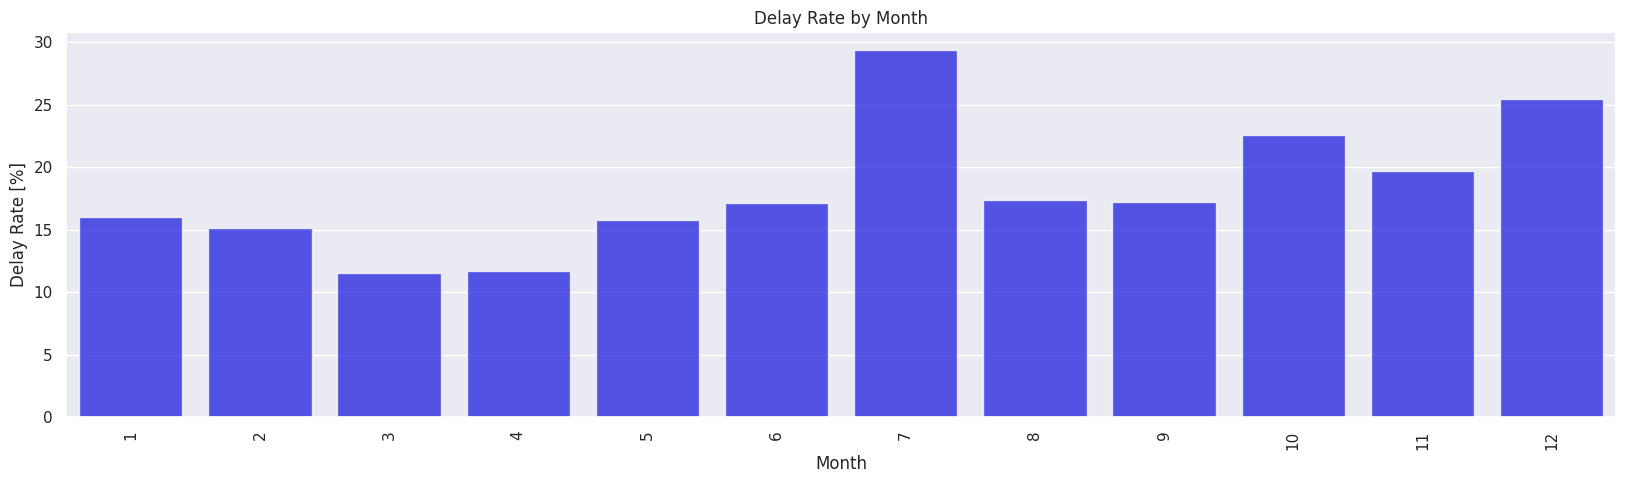

In [24]:
month_rate = get_rate_from_column(data, 'MES')
month_rate_value = data['MES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=month_rate_value, y=month_rate['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Delay Rate by Month')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
#plt.ylim(0,10)
plt.show()

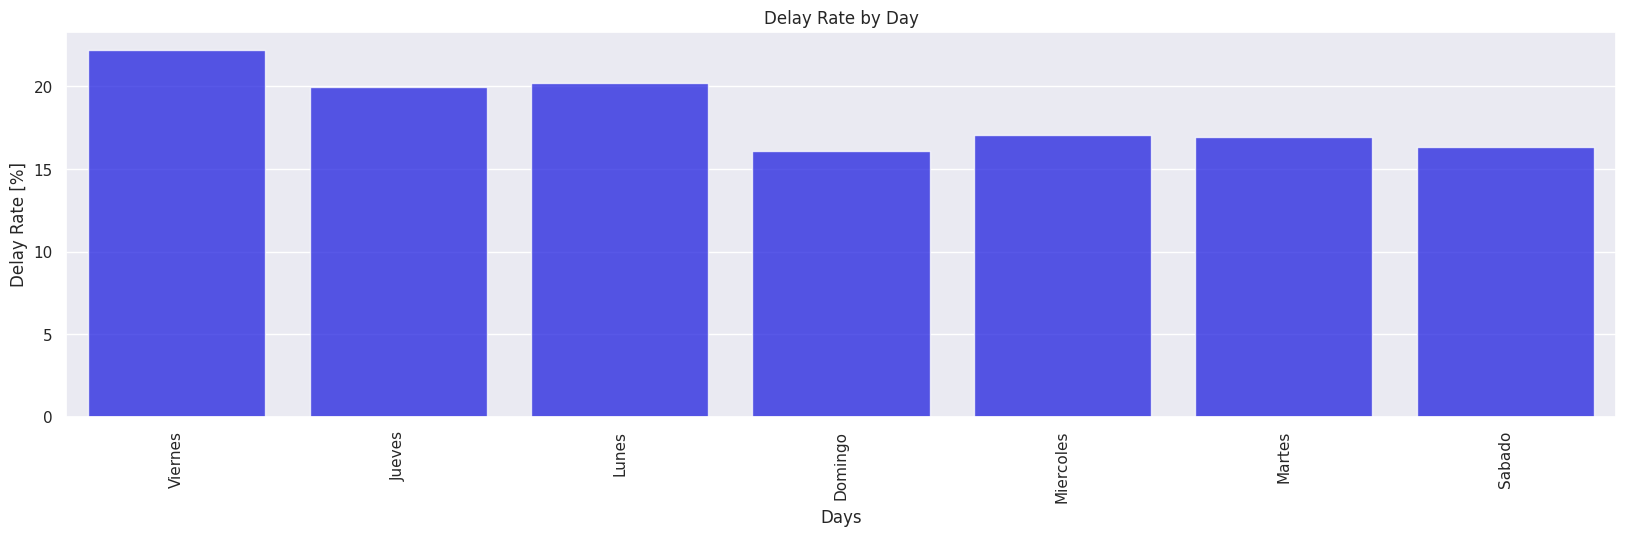

In [25]:
days_rate = get_rate_from_column(data, 'DIANOM')
days_rate_value = data['DIANOM'].value_counts().index

sns.set(style="darkgrid")
plt.figure(figsize = (20, 5))
sns.barplot(x=days_rate_value, y=days_rate['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Delay Rate by Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Days', fontsize=12)
plt.xticks(rotation=90)
#plt.ylim(0,7)
plt.show()

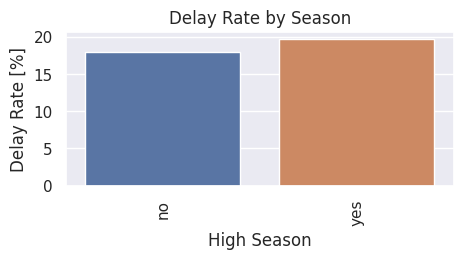

In [26]:
high_season_rate = get_rate_from_column(data, 'high_season')
high_season_rate_values = data['high_season'].value_counts().index

plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=["no", "yes"], y=high_season_rate['Tasa (%)'])
plt.title('Delay Rate by Season')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('High Season', fontsize=12)
plt.xticks(rotation=90)
#plt.ylim(0,1)
plt.show()

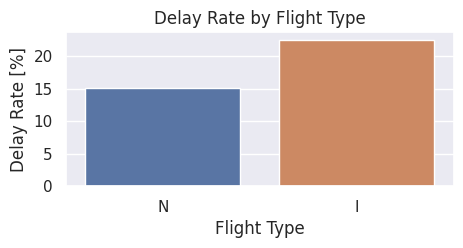

In [27]:
flight_type_rate = get_rate_from_column(data, 'TIPOVUELO')
flight_type_rate_values = data['TIPOVUELO'].value_counts().index
plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=flight_type_rate_values, y=flight_type_rate['Tasa (%)'])
plt.title('Delay Rate by Flight Type')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Flight Type', fontsize=12)
#plt.ylim(0,1)
plt.show()

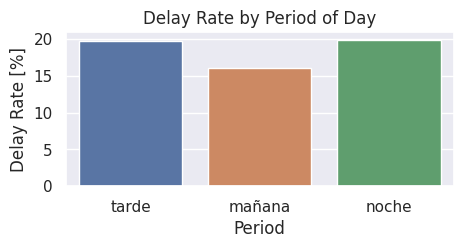

In [28]:
period_day_rate = get_rate_from_column(data, 'period_day')
period_day_rate_values = data['period_day'].value_counts().index
plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=period_day_rate_values, y=period_day_rate['Tasa (%)'])
plt.title('Delay Rate by Period of Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Period', fontsize=12)
#plt.ylim(3,7)
plt.show()

In [29]:
### Sample of final data after add the new features
data.sample(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,period_day,high_season,min_diff,delay
55669,2017-10-05 16:45:00,201,SCEL,SCIE,JAT,2017-10-05 16:45:00,201,SCEL,SCIE,JAT,...,2017,Jueves,N,JetSmart SPA,Santiago,Concepcion,tarde,0,0.0,0
25524,2017-05-29 05:45:00,281,SCEL,SCCI,LAN,2017-05-29 05:52:00,281,SCEL,SCCI,LXP,...,2017,Lunes,N,Grupo LATAM,Santiago,Punta Arenas,mañana,0,7.0,0
66980,2017-12-07 22:45:00,638,SCEL,SPJC,LAN,2017-12-07 22:54:00,638.0,SCEL,SPJC,LAN,...,2017,Jueves,I,Grupo LATAM,Santiago,Lima,noche,0,9.0,0
12178,2017-03-18 03:21:00,174,SCEL,MPTO,CMP,2017-03-18 03:16:00,174,SCEL,MPTO,CMP,...,2017,Sabado,I,Copa Air,Santiago,Ciudad de Panama,noche,0,-5.0,0
36079,2017-07-07 22:29:00,269,SCEL,SCTE,LAN,2017-07-07 22:33:00,269,SCEL,SCTE,LXP,...,2017,Viernes,N,Grupo LATAM,Santiago,Puerto Montt,noche,0,4.0,0


## 4. Training

### 4.a. Data Split (Training and Validation)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
training_data = shuffle(data[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'delay']], random_state = 111)

In [32]:
features = pd.concat(
    [
        pd.get_dummies(data['OPERA'], prefix = 'OPERA'),
        pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO'), 
        pd.get_dummies(data['MES'], prefix = 'MES'),
    ],
    axis = 1
)
target = data['delay']

In [33]:
features.columns

Index(['OPERA_Aerolineas Argentinas', 'OPERA_Aeromexico', 'OPERA_Air Canada',
       'OPERA_Air France', 'OPERA_Alitalia', 'OPERA_American Airlines',
       'OPERA_Austral', 'OPERA_Avianca', 'OPERA_British Airways',
       'OPERA_Copa Air', 'OPERA_Delta Air', 'OPERA_Gol Trans',
       'OPERA_Grupo LATAM', 'OPERA_Iberia', 'OPERA_JetSmart SPA',
       'OPERA_K.L.M.', 'OPERA_Lacsa', 'OPERA_Latin American Wings',
       'OPERA_Oceanair Linhas Aereas', 'OPERA_Plus Ultra Lineas Aereas',
       'OPERA_Qantas Airways', 'OPERA_Sky Airline', 'OPERA_United Airlines',
       'TIPOVUELO_I', 'TIPOVUELO_N', 'MES_1', 'MES_2', 'MES_3', 'MES_4',
       'MES_5', 'MES_6', 'MES_7', 'MES_8', 'MES_9', 'MES_10', 'MES_11',
       'MES_12'],
      dtype='object')

In [34]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.33, random_state = 42)

In [35]:
print(f"train shape: {x_train.shape} | test shape: {x_test.shape}")

train shape: (45698, 37) | test shape: (22508, 37)


In [36]:
y_train.value_counts('%')*100

0    81.618452
1    18.381548
Name: delay, dtype: float64

In [37]:
y_test.value_counts('%')*100

0    81.277768
1    18.722232
Name: delay, dtype: float64

### 4.b. Model Selection

#### 4.b.i. XGBoost

In [38]:
!pip install xgboost

In [39]:
import xgboost as xgb
from xgboost import plot_importance

In [40]:
xgb_model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [41]:
xgboost_y_preds = xgb_model.predict(x_test)
xgboost_y_preds = [1 if y_pred > 0.5 else 0 for y_pred in xgboost_y_preds]

In [42]:
confusion_matrix(y_test, xgboost_y_preds)

array([[18294,     0],
       [ 4214,     0]])

In [43]:
confusion_matrix(y_test, xgboost_y_preds)

array([[18294,     0],
       [ 4214,     0]])

In [44]:
print(classification_report(y_test, xgboost_y_preds))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.00      0.00      0.00      4214

    accuracy                           0.81     22508
   macro avg       0.41      0.50      0.45     22508
weighted avg       0.66      0.81      0.73     22508



#### 4.b.ii. Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
reg_model = LogisticRegression()
reg_model.fit(x_train, y_train)

LogisticRegression()

In [47]:
reg_y_preds = reg_model.predict(x_test)

In [48]:
confusion_matrix(y_test, reg_y_preds)

array([[18193,   101],
       [ 4086,   128]])

In [49]:
print(classification_report(y_test, reg_y_preds))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     18294
           1       0.56      0.03      0.06      4214

    accuracy                           0.81     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.81      0.74     22508



## 5. Data Analysis: Third Sight

### Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1000x500 with 0 Axes>

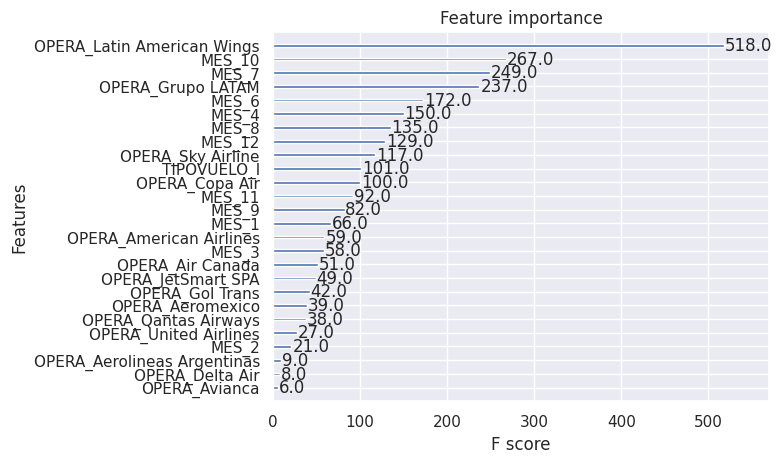

In [50]:
plt.figure(figsize = (10,5))
plot_importance(xgb_model)

In [51]:
top_10_features = [
    "OPERA_Latin American Wings", 
    "MES_7",
    "MES_10",
    "OPERA_Grupo LATAM",
    "MES_12",
    "TIPOVUELO_I",
    "MES_4",
    "MES_11",
    "OPERA_Sky Airline",
    "OPERA_Copa Air"
]

### Data Balance

In [52]:
n_y0 = len(y_train[y_train == 0])
n_y1 = len(y_train[y_train == 1])
scale = n_y0/n_y1
print(scale)

4.4402380952380955


## 6. Training with Improvement

### 6.a. Data Split

In [53]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features[top_10_features], target, test_size = 0.33, random_state = 42)

### 6.b. Model Selection

#### 6.b.i. XGBoost with Feature Importance and with Balance

In [54]:
xgb_model_2 = xgb.XGBClassifier(random_state=1, learning_rate=0.01, scale_pos_weight = scale)
xgb_model_2.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [55]:
xgboost_y_preds_2 = xgb_model_2.predict(x_test2)

In [56]:
confusion_matrix(y_test2, xgboost_y_preds_2)

array([[9556, 8738],
       [1313, 2901]])

In [57]:
print(classification_report(y_test2, xgboost_y_preds_2))

              precision    recall  f1-score   support

           0       0.88      0.52      0.66     18294
           1       0.25      0.69      0.37      4214

    accuracy                           0.55     22508
   macro avg       0.56      0.61      0.51     22508
weighted avg       0.76      0.55      0.60     22508



#### 6.b.ii. XGBoost with Feature Importance but without Balance

In [58]:
xgb_model_3 = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model_3.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [59]:
xgboost_y_preds_3 = xgb_model_3.predict(x_test2)

In [60]:
confusion_matrix(y_test2, xgboost_y_preds_3)

array([[18286,     8],
       [ 4188,    26]])

In [61]:
print(classification_report(y_test2, xgboost_y_preds_3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.76      0.01      0.01      4214

    accuracy                           0.81     22508
   macro avg       0.79      0.50      0.45     22508
weighted avg       0.80      0.81      0.73     22508



#### 6.b.iii. Logistic Regression with Feature Importante and with Balance

In [62]:
reg_model_2 = LogisticRegression(class_weight={1: n_y0/len(y_train), 0: n_y1/len(y_train)})
reg_model_2.fit(x_train2, y_train2)

LogisticRegression(class_weight={0: 0.18381548426626987, 1: 0.8161845157337302})

In [63]:
reg_y_preds_2 = reg_model_2.predict(x_test2)

In [64]:
confusion_matrix(y_test2, reg_y_preds_2)

array([[9487, 8807],
       [1314, 2900]])

In [65]:
print(classification_report(y_test2, reg_y_preds_2))

              precision    recall  f1-score   support

           0       0.88      0.52      0.65     18294
           1       0.25      0.69      0.36      4214

    accuracy                           0.55     22508
   macro avg       0.56      0.60      0.51     22508
weighted avg       0.76      0.55      0.60     22508



#### 6.b.iv. Logistic Regression with Feature Importante but without Balance

In [66]:
reg_model_3 = LogisticRegression()
reg_model_3.fit(x_train2, y_train2)

LogisticRegression()

In [67]:
reg_y_preds_3 = reg_model_3.predict(x_test2)

In [68]:
confusion_matrix(y_test2, reg_y_preds_3)

array([[18246,    48],
       [ 4160,    54]])

In [69]:
print(classification_report(y_test2, reg_y_preds_3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.53      0.01      0.03      4214

    accuracy                           0.81     22508
   macro avg       0.67      0.51      0.46     22508
weighted avg       0.76      0.81      0.73     22508



## 7. Data Science Conclusions

By looking at the results of the 6 trained models, it can be determined:
- There is no noticeable difference in results between XGBoost and LogisticRegression.
- Does not decrease the performance of the model by reducing the features to the 10 most important.
- Improves the model's performance when balancing classes, since it increases the recall of class "1".

**With this, the model to be productive must be the one that is trained with the top 10 features and class balancing, but which one?**

### More analysis to support the model chose

It seems the two models with top 10 featurs and balancing are performing almost exactly equal for every metric.
Given this, it is hard to pick one.

So it is recommended to check if this behaivor corresponds is for the exact data split that was done or it change between splits.

I am going to performe an **cross validation**  so we pick 3 different splits changing train and test data and see if the model results are consitent. with the above results.

In [70]:
from sklearn.model_selection import StratifiedKFold

In [71]:
def get_score(model, fold_indx, x_train, x_test, y_train, y_test):
    
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    df_temp = pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))
    df_temp["model"] = str(model.__class__.__name__)
    df_temp["fold_indx"] = fold_indx
    df_temp = df_temp.reset_index()
    df_temp = df_temp.rename(columns={"index": "metric"})
    return df_temp

In [80]:
kf = StratifiedKFold(n_splits=3)
result_fold = []
data_fols = []
fold_indx = 0
features_10 = features[top_10_features].copy()
for train_indx, test_indx  in kf.split(features_10, target):
    x_train, x_test, y_train, y_test = features_10.iloc[train_indx], features_10.iloc[test_indx], target.iloc[train_indx], target.iloc[test_indx]
    
    data_fols.append({"fold":fold_indx, "x_train":x_train, "x_test": x_test, "y_train": y_train, "y_test":y_test})

    # Train XGBoost model
    n_y0 = len(y_train[y_train == 0])
    n_y1 = len(y_train[y_train == 1])
    scale = n_y0/n_y1
    xgb_model = xgb.XGBClassifier(random_state=1, learning_rate=0.01, scale_pos_weight = scale)
    result_xb = get_score(xgb_model,fold_indx,  x_train, x_test, y_train, y_test)
    result_fold.append(result_xb)

    # Train LogisticRegressionModel
    log_reg_model = LogisticRegression(class_weight={1: n_y0/len(y_train), 0: n_y1/len(y_train)})
    
    result_log_reg = get_score(log_reg_model, fold_indx, x_train, x_test, y_train, y_test)
    result_fold.append(result_log_reg)
    
    fold_indx += 1

In [81]:
# Checking the data size match with the  used for the DS
for i in range(3):
    print(i, "y_train", data_fols[i]["y_train"].value_counts('%')*100)
    print(i, "y_test", data_fols[i]["y_test"].value_counts('%')*100)

0 y_train 0    81.506488
1    18.493512
Name: delay, dtype: float64
0 y_test 0    81.505102
1    18.494898
Name: delay, dtype: float64
1 y_train 0    81.504695
1    18.495305
Name: delay, dtype: float64
1 y_test 0    81.508687
1    18.491313
Name: delay, dtype: float64
2 y_train 0    81.506895
1    18.493105
Name: delay, dtype: float64
2 y_test 0    81.504289
1    18.495711
Name: delay, dtype: float64


In [82]:
results_concat = pd.concat(result_fold)
results_concat.sort_values(["fold_indx", "metric", "model"])

,metric,0,1,accuracy,macro avg,weighted avg,model,fold_indx
2,f1-score,0.896644,0.044605,0.813468,0.470624,0.739060,LogisticRegression,0
2,f1-score,0.896644,0.044605,0.813468,0.470624,0.739060,XGBClassifier,0
0,precision,0.817527,0.423077,0.813468,0.620302,0.744574,LogisticRegression,0
0,precision,0.817527,0.423077,0.813468,0.620302,0.744574,XGBClassifier,0
1,recall,0.992715,0.023543,0.813468,0.508129,0.813468,LogisticRegression,0
1,recall,0.992715,0.023543,0.813468,0.508129,0.813468,XGBClassifier,0
3,support,18531.000000,4205.000000,0.813468,22736.000000,22736.000000,LogisticRegression,0
3,support,18531.000000,4205.000000,0.813468,22736.000000,22736.000000,XGBClassifier,0
2,f1-score,0.685246,0.332876,0.572289,0.509061,0.620088,LogisticRegression,1
2,f1-score,0.666382,0.323187,0.553068,0.494784,0.602921,XGBClassifier,1


In [75]:
!pip install tabulate

#### Print all results for folds by each metric of the classification_report

Also I aggregate results for each metric getting the mean for model in all folds

In [95]:
agg_metrics = []
for metric in results_concat.metric.unique():
    print(results_concat[results_concat["metric"] == metric].sort_values(["fold_indx", "metric", "macro avg", "model"]).to_markdown())
    tmp = results_concat[results_concat["metric"] == metric]
    temp_df = tmp.groupby(["model"], as_index=False)["0", "1", "accuracy"].mean()
    temp_df["metric"] = metric
    agg_metrics.append(temp_df)
    print("_________")
df_arg_results = pd.concat(agg_metrics)
df_arg_results.rename(columns={'0': 'CLASS_ON_TIME', '1': 'CLASS DELAY'}, inplace=True)

|    | metric    |        0 |        1 |   accuracy |   macro avg |   weighted avg | model              |   fold_indx |
|---:|:----------|---------:|---------:|-----------:|------------:|---------------:|:-------------------|------------:|
|  0 | precision | 0.817527 | 0.423077 |   0.813468 |    0.620302 |       0.744574 | LogisticRegression |           0 |
|  0 | precision | 0.817527 | 0.423077 |   0.813468 |    0.620302 |       0.744574 | XGBClassifier      |           0 |
|  0 | precision | 0.850914 | 0.224443 |   0.553068 |    0.537678 |       0.735071 | XGBClassifier      |           1 |
|  0 | precision | 0.856184 | 0.233899 |   0.572289 |    0.545041 |       0.741115 | LogisticRegression |           1 |
|  0 | precision | 0.84564  | 0.220915 |   0.558434 |    0.533277 |       0.730093 | XGBClassifier      |           2 |
|  0 | precision | 0.84431  | 0.22599  |   0.586892 |    0.53515  |       0.729948 | LogisticRegression |           2 |
_________
|    | metric   |        0 |  

In [96]:
df_arg_results

,model,CLASS_ON_TIME,CLASS DELAY,accuracy,metric
0,LogisticRegression,0.839341,0.294322,0.657550,precision
1,XGBClassifier,0.838027,0.289478,0.641657,precision
0,LogisticRegression,0.722854,0.369764,0.657550,recall
1,XGBClassifier,0.700296,0.383240,0.641657,recall
0,LogisticRegression,0.762182,0.230143,0.657550,f1-score
1,XGBClassifier,0.745741,0.227621,0.641657,f1-score
0,LogisticRegression,18530.666667,4204.666667,0.657550,support
1,XGBClassifier,18530.666667,4204.666667,0.641657,support


In [99]:
print(df_arg_results[df_arg_results["metric"] != 'support'].set_index("model").to_markdown())

| model              |   CLASS_ON_TIME |   CLASS DELAY |   accuracy | metric    |
|:-------------------|----------------:|--------------:|-----------:|:----------|
| LogisticRegression |        0.839341 |      0.294322 |   0.65755  | precision |
| XGBClassifier      |        0.838027 |      0.289478 |   0.641657 | precision |
| LogisticRegression |        0.722854 |      0.369764 |   0.65755  | recall    |
| XGBClassifier      |        0.700296 |      0.38324  |   0.641657 | recall    |
| LogisticRegression |        0.762182 |      0.230143 |   0.65755  | f1-score  |
| XGBClassifier      |        0.745741 |      0.227621 |   0.641657 | f1-score  |


#### Looking at Presition and Recall Metrics:

- Presition: TP/ (TP+ FP): % of correctly labeled positive (flys with delay) out of all rows **labeled** as positive (it can include flys On time that were labeled as delayed by the model).
- Recall: TP/ (TP+ FN): % of correclty labeled positive (flys with delay) out of all positives.

In this case, after checking some research [[1]](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00380-z), it seems better way to determine best model is to look at Recall for the class 1 (delay).

This is because we want pick the models with the best performance on tagging flys as delayed only in the cases of actually it is true.
So we prefer Recall over Precision in this case, since we wan to  avoid get too much False Negatives (flys delayed that was predicted as ON TIME for the model)
Given that Best model in the cross_validation for Recall in class 1 is the **XGBClassifier** with a mean of **0.383240** in the 3 folds tested.